In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
model_data = pd.read_csv('data/model_data.csv')
agent_data = pd.read_csv('data/agent_data.csv')

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 0'),
 (0.0, 1.0),
 (0.0, 1.0)]

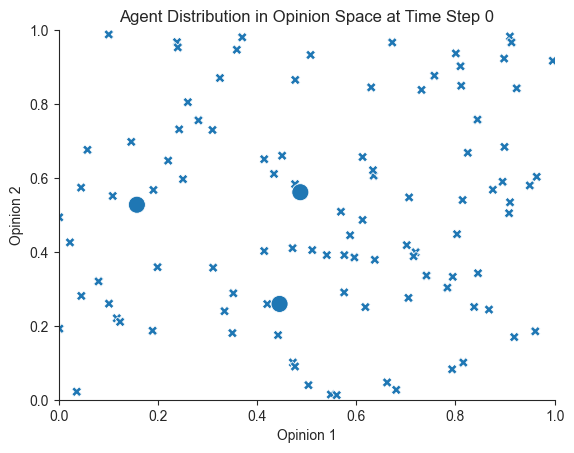

In [33]:
# agent starting positions
t0_agent_locations = agent_data.loc[agent_data['Step'] == 0]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
t0_plot = sns.scatterplot(
    data=t0_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    legend=False
)

t0_plot.spines[['right', 'top']].set_visible(False)
t0_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step 0',
    xlim=(0, 1),
    ylim=(0, 1)
)

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 8000'),
 (0.0, 1.0),
 (0.0, 1.0)]

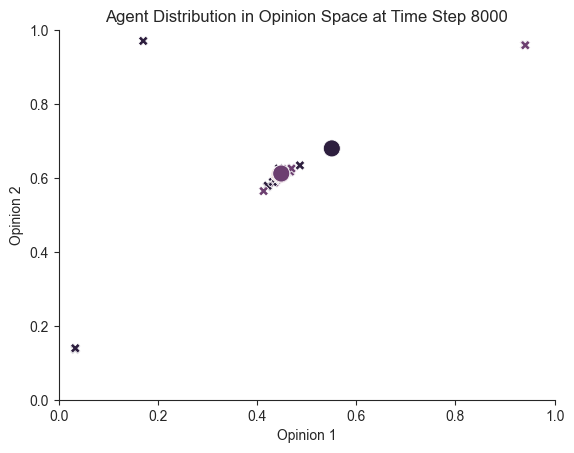

In [35]:
# agent positions at time step t >= 1
t = 8000
tn_agent_locations = agent_data.loc[agent_data['Step'] == t]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
tn_plot = sns.scatterplot(
    data=tn_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    hue='voted_for',
    legend=False
)

tn_plot.spines[['right', 'top']].set_visible(False)
tn_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step '+str(t),
    xlim=(0, 1),
    ylim=(0, 1)
)

[Text(0.5, 0, 'Time Step'),
 Text(0, 0.5, 'Variance in Opinion'),
 Text(0.5, 1.0, 'Variance in Opinions over Time')]

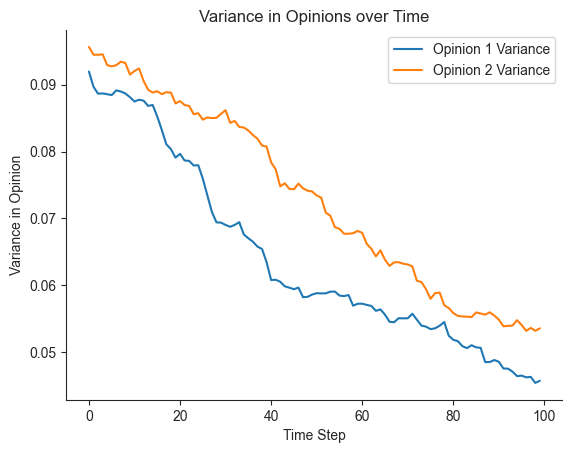

In [37]:
# plotting variance
# for step in range(1):
#     mean = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']].mean()
#     n = len(agent_data.loc[agent_data['Step'] == step].index)
#     difference_squared_sum = 0
#     for i in range(n):
#         x_i = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']]
#         print(mean)
#         print(x_i)
#         difference_squared_sum += agent_data.loc[agent_data['Step'] == step]
#         print(agent_data.loc[agent_data['Step'] == step])

variances = {'Step': [], 'var_opinion1': [], 'var_opinion2': []}
for step in range(100):
    var = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']].var()
    variances['Step'].append(step)
    variances['var_opinion1'].append(var[0])
    variances['var_opinion2'].append(var[1])

var_df = pd.DataFrame(variances)

# set plot styles
sns.set_style('ticks')

# plot
var_plot = sns.lineplot(
    data=var_df,
    x='Step',
    y='var_opinion1',
    label='Opinion 1 Variance'
)

var_plot = sns.lineplot(
    data=var_df,
    x='Step',
    y='var_opinion2',
    label='Opinion 2 Variance'
)

# plt.xlabel('Time Step')
# plt.ylabel('Variance in Opinion')
# plt.title('Variance of Opinions over Time')
var_plot.spines[['right', 'top']].set_visible(False)
var_plot.set(
    xlabel='Time Step',
    ylabel='Variance in Opinion',
    title='Variance in Opinions over Time'
)


<Axes: xlabel='Step', ylabel='opinion1'>

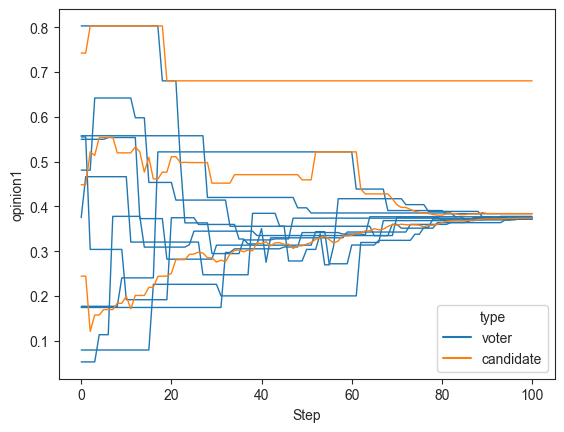

In [12]:
sns.lineplot(
    data=agent_data,
    x="Step", y="opinion1", hue="type", units="AgentID",
    estimator=None, lw=1,
)

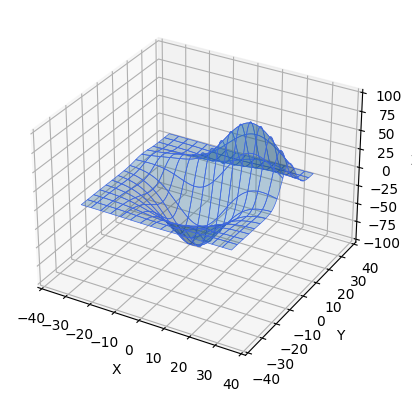

In [4]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [34]:
## PARAMETER SWEEP HEATMAP
from model import ElectionSystem
from run import run_model, save_data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

responsiveness_list = np.linspace(0.1, 1, 9, endpoint=False)
tolerance_list = np.linspace(0.1, 1, 9, endpoint=False)
df = pd.DataFrame(columns=['responsiveness', 'tolerance', 'variance'])

for responsiveness in responsiveness_list:
    for tolerance in tolerance_list:

        model = ElectionSystem(
                #seed=0,
                num_voters=100,
                num_voters_to_activate=1,
                initial_num_candidates=3,
                min_candidates=3,
                max_candidates=5,
                term_limit=2,
                num_opinions=1,
                election_system='plurality', # plurality, rc, score
                voter_voter_interaction_fn='ar', # avg, bc, bc1, ar
                voter_candidate_interaction_fn='ar', # avg, bc, bc1, ar
                voter_noise_factor=0.01,
                initial_exit_probability=0.33,
                exit_probability_decrease_factor=0.25,     
                initial_threshold=tolerance,
                threshold_increase_factor=0.1,
                num_candidates_to_benefit=2,
                num_rounds_before_election=10,
                mu=0.5, # mu in bounded confidence (controls magnitude of opinion update)
                radius=0.1, # r in radius of support function (controls inflection point)
                learning_rate=0.001, # learning rate for candidate gradient ascent
                gamma=10, # gamma in radius of support function (controls steepness which is effectively variation in voting probabilities)
                beta=1,
                second_choice_weight_factor=0.5,
                exposure=0.2,
                responsiveness=responsiveness
            )

        num_steps = 100
        run_model(model, time_steps=num_steps)
        save_data(model)

        agent_data = pd.read_csv('data/agent_data.csv')

        variance = float(agent_data.loc[agent_data['Step'] == num_steps][['opinion1']].var())
        df.loc[df.shape[0]] = [responsiveness, tolerance, variance]

sns.heatmap(data=df.pivot('responsiveness', 'tolerance', 'variance'), cmap='rocket')
plt.xlabel('Tolerance')
plt.ylabel('Responsiveness')
plt.title('Heatmap of Variance')


 69%|██████▉   | 69/100 [00:00<00:00, 490.61it/s]


ValueError: probabilities contain NaN